## Car accident severity model for Seattle
### Applied Data Science Capstone by IBM/Coursera
####    - Marta Ferreira -

### Data cleaning and normalization:
First steps were to select the data that we wnat to work with. So the attributes were selected and putted in a specific dataframe.

In [1]:
#IMPORT LIBRARIES NECESSARY
from IPython.display import display_html
from IPython.display import Image 
from IPython.core.display import HTML
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import requests
from selenium import webdriver

import sys
import csv
import datetime as dt
import requests
import random
import seaborn as sns
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_validate, cross_val_score
from sklearn.datasets.samples_generator import make_blobs
from sklearn.utils import resample
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

print('Libraries imported.')

Libraries imported.


Open the CSV dataset provided by IBM

In [2]:
pd.set_option('display.max_columns', None)
df = pd.read_csv('Data-Collisions.csv', low_memory=False)

Having a scoop on the dataset. We need to see what kind of attributes we have to work with and the type of each of them. Decided to get a more detailed look at the number of accidents associated with speeding. 

In [3]:
print("Data frame shape:", df.shape, '\n')

print("Data types:\n\n",df.dtypes, '\n')

print("Amounts:\n", df['SPEEDING'].value_counts())

Data frame shape: (194673, 38) 

Data types:

 SEVERITYCODE        int64
X                 float64
Y                 float64
OBJECTID            int64
INCKEY              int64
COLDETKEY           int64
REPORTNO           object
STATUS             object
ADDRTYPE           object
INTKEY            float64
LOCATION           object
EXCEPTRSNCODE      object
EXCEPTRSNDESC      object
SEVERITYCODE.1      int64
SEVERITYDESC       object
COLLISIONTYPE      object
PERSONCOUNT         int64
PEDCOUNT            int64
PEDCYLCOUNT         int64
VEHCOUNT            int64
INCDATE            object
INCDTTM            object
JUNCTIONTYPE       object
SDOT_COLCODE        int64
SDOT_COLDESC       object
INATTENTIONIND     object
UNDERINFL          object
WEATHER            object
ROADCOND           object
LIGHTCOND          object
PEDROWNOTGRNT      object
SDOTCOLNUM        float64
SPEEDING           object
ST_COLCODE         object
ST_COLDESC         object
SEGLANEKEY          int64
CROSSWALKKEY     

In [4]:
df.head()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,LOCATION,EXCEPTRSNCODE,EXCEPTRSNDESC,SEVERITYCODE.1,SEVERITYDESC,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INCDATE,INCDTTM,JUNCTIONTYPE,SDOT_COLCODE,SDOT_COLDESC,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,5TH AVE NE AND NE 103RD ST,,NaN,2,Injury Collision,Angles,2,0,0,2,2013/03/27 00:00:00+00,3/27/2013 2:54:00 PM,At Intersection (intersection related),11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,N,Overcast,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,AURORA BR BETWEEN RAYE ST AND BRIDGE WAY N,NaN,NaN,1,Property Damage Only Collision,Sideswipe,2,0,0,2,2006/12/20 00:00:00+00,12/20/2006 6:55:00 PM,Mid-Block (not related to intersection),16,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, LEFT SIDE ...",NaN,0,Raining,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,4TH AVE BETWEEN SENECA ST AND UNIVERSITY ST,NaN,NaN,1,Property Damage Only Collision,Parked Car,4,0,0,3,2004/11/18 00:00:00+00,11/18/2004 10:20:00 AM,Mid-Block (not related to intersection),14,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, REAR END",NaN,0,Overcast,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,2ND AVE BETWEEN MARION ST AND MADISON ST,,NaN,1,Property Damage Only Collision,Other,3,0,0,3,2013/03/29 00:00:00+00,3/29/2013 9:26:00 AM,Mid-Block (not related to intersection),11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,N,Clear,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,SWIFT AVE S AND SWIFT AV OFF RP,NaN,NaN,2,Injury Collision,Angles,2,0,0,2,2004/01/28 00:00:00+00,1/28/2004 8:04:00 AM,At Intersection (intersection related),11,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",NaN,0,Raining,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


After being able to see a small sample of the dataset, we can see that we need to work on it. Since it is not a balanced labeled dataset, we need to process it and normalize the dataset. First set, before anything else, is to choose the attributes that we want to work with.

In [5]:
col = ["SEVERITYCODE", "INCDTTM", "WEATHER", "ROADCOND", "LIGHTCOND", "VEHCOUNT", "PERSONCOUNT", 'PEDCOUNT', 'PEDCYLCOUNT']
df_ac = df[col]
df_ac[:5]

,SEVERITYCODE,INCDTTM,WEATHER,ROADCOND,LIGHTCOND,VEHCOUNT,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT
0,2,3/27/2013 2:54:00 PM,Overcast,Wet,Daylight,2,2,0,0
1,1,12/20/2006 6:55:00 PM,Raining,Wet,Dark - Street Lights On,2,2,0,0
2,1,11/18/2004 10:20:00 AM,Overcast,Dry,Daylight,3,4,0,0
3,1,3/29/2013 9:26:00 AM,Clear,Dry,Daylight,3,3,0,0
4,2,1/28/2004 8:04:00 AM,Raining,Wet,Daylight,2,2,0,0


##### Remove Null or NaN values and reseting the index

In [6]:
#Taking the null values from and reset the index
df_ac = df_ac.dropna()
df_ac = df_ac.reset_index()
df_ac.head()

,index,SEVERITYCODE,INCDTTM,WEATHER,ROADCOND,LIGHTCOND,VEHCOUNT,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT
0,0,2,3/27/2013 2:54:00 PM,Overcast,Wet,Daylight,2,2,0,0
1,1,1,12/20/2006 6:55:00 PM,Raining,Wet,Dark - Street Lights On,2,2,0,0
2,2,1,11/18/2004 10:20:00 AM,Overcast,Dry,Daylight,3,4,0,0
3,3,1,3/29/2013 9:26:00 AM,Clear,Dry,Daylight,3,3,0,0
4,4,2,1/28/2004 8:04:00 AM,Raining,Wet,Daylight,2,2,0,0


##### Since the data format was not even for every row, we are creating a column with a normalized data (month-year)

In [7]:
#Change INCDTTM to datetime format for extraction of year and month for new columns. 
df_ac['INCDTTM_dt'] = pd.to_datetime(df_ac.INCDTTM)
df_ac['INCDTTM_year'] = df_ac.INCDTTM_dt.dt.year
df_ac['INCDTTM_month'] = df_ac.INCDTTM_dt.dt.month
df_ac['INCDTTM_year_str'] = df_ac.INCDTTM_year.astype(str)
df_ac['INCDTTM_month_str'] = df_ac.INCDTTM_month.astype(str)
df_ac['INCDTTM_year_month'] = df_ac[['INCDTTM_month_str', 'INCDTTM_year_str']].apply(lambda x: '-'.join(x),axis=1)

##### Normailizing the data

In [8]:
weather_dict = {'Overcast':1, 'Raining':2, 'Clear':3, 'Other':4, 'Snowing':5,
               'Fog/Smog/Smoke':6, 'Sleet/Hail/Freezing Rain':7, 'Blowing Sand/Dirt':8,
               'Severe Crosswind':9, 'Partly Cloudy':10}
df_ac['WEATHER_int'] = df_ac.WEATHER.apply(lambda x: weather_dict.get(x)).fillna(0).astype(int)

roadcond_dict = {'Wet':1, 'Dry':2, 'Unknown':3, 'Snow/Slush':4, 'Ice':5, 'Other':6,
                'Sand/Mud/Dirt':7, 'Standing Water':8, 'Oil':9}
df_ac['ROADCOND_int'] = df_ac.ROADCOND.apply(lambda x: roadcond_dict.get(x)).fillna(0).astype(int)

light_dict = {'Daylight':1, 'Dark - Street Lights On':2, 'Dark - No Street Lights':3,
             'Unknown':4, 'Dusk':5, 'Dawn':6, 'Dark - Street Lights Off':7,
             'Other':8, 'Dark - Unknown Lighting':9}
df_ac['LIGHTCOND_int'] = df_ac.LIGHTCOND.apply(lambda x: light_dict.get(x)).fillna(0).astype(int)


#View the first 5 rows
df_ac[:5]

,index,SEVERITYCODE,INCDTTM,WEATHER,ROADCOND,LIGHTCOND,VEHCOUNT,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,INCDTTM_dt,INCDTTM_year,INCDTTM_month,INCDTTM_year_str,INCDTTM_month_str,INCDTTM_year_month,WEATHER_int,ROADCOND_int,LIGHTCOND_int
0,0,2,3/27/2013 2:54:00 PM,Overcast,Wet,Daylight,2,2,0,0,2013-03-27 14:54:00,2013,3,2013,3,3-2013,1,1,1
1,1,1,12/20/2006 6:55:00 PM,Raining,Wet,Dark - Street Lights On,2,2,0,0,2006-12-20 18:55:00,2006,12,2006,12,12-2006,2,1,2
2,2,1,11/18/2004 10:20:00 AM,Overcast,Dry,Daylight,3,4,0,0,2004-11-18 10:20:00,2004,11,2004,11,11-2004,1,2,1
3,3,1,3/29/2013 9:26:00 AM,Clear,Dry,Daylight,3,3,0,0,2013-03-29 09:26:00,2013,3,2013,3,3-2013,3,2,1
4,4,2,1/28/2004 8:04:00 AM,Raining,Wet,Daylight,2,2,0,0,2004-01-28 08:04:00,2004,1,2004,1,1-2004,2,1,1


Now all the data is normalized and ready to be used. We can try to have a little scoop in the attributes that we want to use to compare with the Severity of the accident. For this aspect we will use the raw data, to represent the three main attributes on this case study Weather, Road and Light conditions.

#### Creating a few graphs to visualize the amount of accidents per year and condition (Weather, Road and Light) 

In [9]:
#Creating a base for the graphic representation
def create_barh_plot(df_ac, title, save, color):
    plt.figure(figsize=(15,7))
    ax = df_ac.plot(kind='barh', color = color )
    plt.xlabel('Counts')
    plt.ylabel('Types')
    ax.xaxis.label.set_fontsize(18)
    ax.yaxis.label.set_fontsize(18)
    graph_title = title
    plt.title(graph_title, fontsize = 20, fontweight = 'bold')
    graph_title_for_save = save
    plt.show()

1    132285
2     57052
Name: SEVERITYCODE, dtype: int64


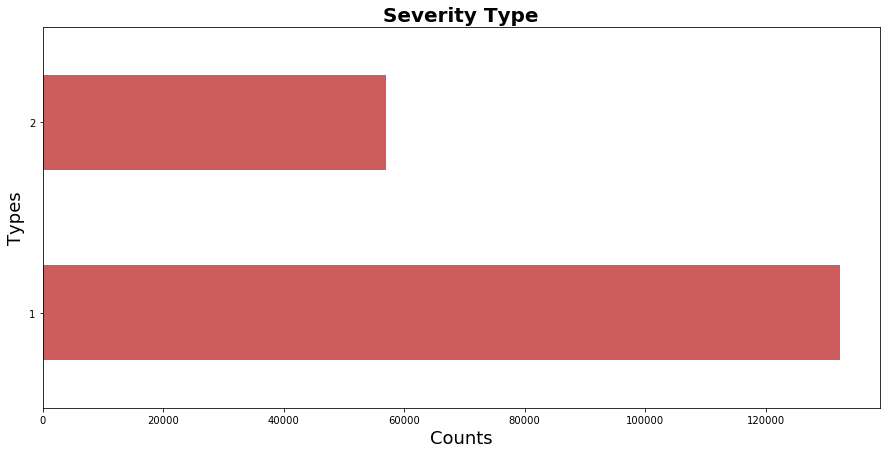

In [10]:
#Severity of accidents representation
severity = df_ac.SEVERITYCODE.value_counts()
print(severity)
create_barh_plot(severity, 'Severity Type', 'SEVERITYCODE', 'indianred')

This gives a visualization of the accident severity type, when 2 represents "Injury", with more than 57.000 accidents, and 1 is the total with "Propriety damage", more than 132.000. Unfortunately, the data is not provided with a most deeply on other types, for example fatalities. 

Clear                       111008
Raining                      33117
Overcast                     27681
Unknown                      15039
Snowing                        901
Other                          824
Fog/Smog/Smoke                 569
Sleet/Hail/Freezing Rain       113
Blowing Sand/Dirt               55
Severe Crosswind                25
Partly Cloudy                    5
Name: WEATHER, dtype: int64


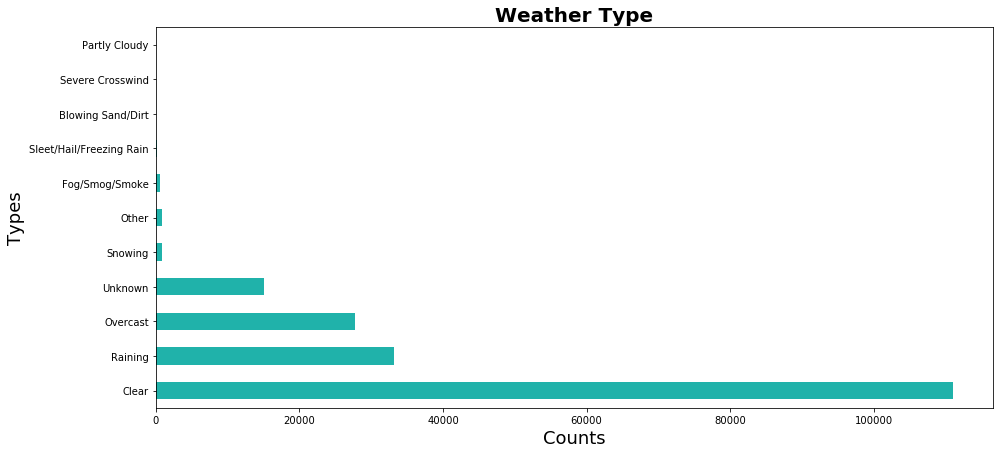

In [11]:
#Accidents per Weather types representation
weather = df_ac.WEATHER.value_counts()
print(weather)
create_barh_plot(weather, 'Weather Type', 'weather_counts', 'lightseagreen')

Normally it is expected that the worst types of weather will cause more accidents, but most of the accidents occurred with Clear weather (111.000 accidents). Following it by 33.000 accidents in raining conditions.

Dry               124300
Wet                47417
Unknown            15031
Ice                 1206
Snow/Slush           999
Other                131
Standing Water       115
Sand/Mud/Dirt         74
Oil                   64
Name: ROADCOND, dtype: int64


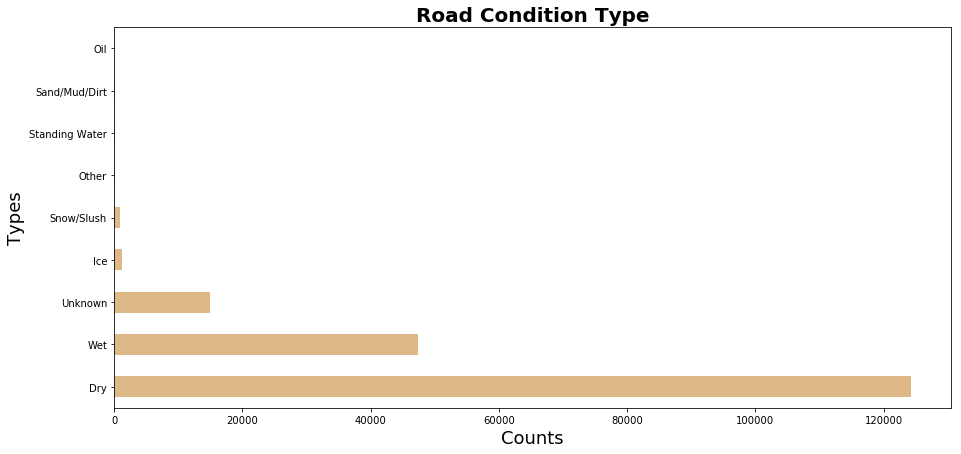

In [12]:
#Accidents per Road Condition types representation
roadcond = df_ac.ROADCOND.value_counts()
print(roadcond)
create_barh_plot(roadcond, 'Road Condition Type', 'roadcond_counts', 'burlywood')

When we observed the "Road condition" we see that mainly the accidents happened with a Dry floor (124.000).

Daylight                    116077
Dark - Street Lights On      48440
Unknown                      13456
Dusk                          5889
Dawn                          2502
Dark - No Street Lights       1535
Dark - Street Lights Off      1192
Other                          235
Dark - Unknown Lighting         11
Name: LIGHTCOND, dtype: int64


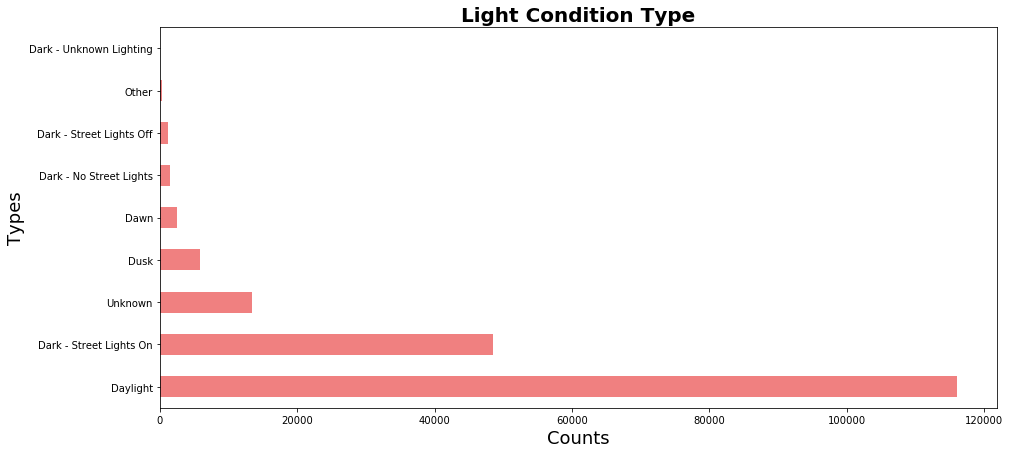

In [13]:
#Accidents per Light Conditions types representation
lightcond = df_ac.LIGHTCOND.value_counts()
print(lightcond)
create_barh_plot(lightcond, 'Light Condition Type', 'lightcond_counts', 'lightcoral')

Regarding the "Light conditions" the largest group represent that the accidents happened by Day.
Ending the representation of the three main attributes in study we can see that the accidents happened mostly during the day, with dry roads and with clear sky. Now we will need to process the rest of the information to be able to see the correlation between accident severity and the conditions represented above.

2006    15181
2005    15115
2007    14450
2008    13654
2015    12719
2004    11865
2009    11734
2014    11534
2011    10919
2016    10870
2010    10804
2017    10439
2012    10244
2013     9976
2018     9873
2019     8705
2020     1255
Name: INCDTTM_year_str, dtype: int64


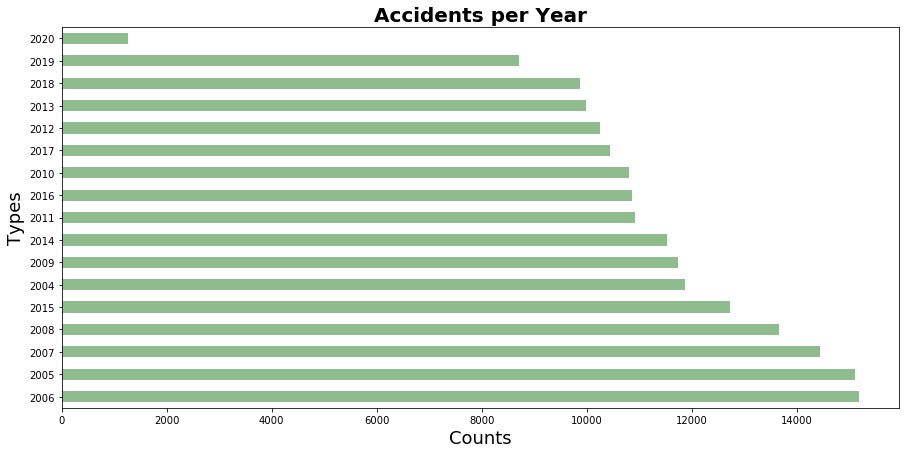

In [14]:
#Representation of accidents per year
year = df_ac.INCDTTM_year_str.value_counts()
print(year)
create_barh_plot(year, 'Accidents per Year', 'count', 'darkseagreen')



Lastly, we can see that since 2006 till 2019 (not considering 2020 since the year is not ended) a steady decrease on the number of accidents. Even so, the complete year with less accidents (2019) presents around 9.000 accidents. 

### Analysis:
We will start now the analyses of the elements. We will start with saving the attributes that we want to study in a specific dataframe and from there we will create the Machine Learning model

In [15]:
int_cols = ['SEVERITYCODE', 'INCDTTM_year_month','WEATHER_int', 'ROADCOND_int', 'LIGHTCOND_int']
predict = df_ac[int_cols]
predict[:5]

,SEVERITYCODE,INCDTTM_year_month,WEATHER_int,ROADCOND_int,LIGHTCOND_int
0,2,3-2013,1,1,1
1,1,12-2006,2,1,2
2,1,11-2004,1,2,1
3,1,3-2013,3,2,1
4,2,1-2004,2,1,1


In [16]:
predict.head()

,SEVERITYCODE,INCDTTM_year_month,WEATHER_int,ROADCOND_int,LIGHTCOND_int
0,2,3-2013,1,1,1
1,1,12-2006,2,1,2
2,1,11-2004,1,2,1
3,1,3-2013,3,2,1
4,2,1-2004,2,1,1


### One Hot Encoding

Next we will be putting all the attributes necessary to a numerical code, so that we can be able to process the data and create the model 

In [17]:
Feature = predict[['WEATHER_int', 'ROADCOND_int', 'LIGHTCOND_int']]
Feature = pd.concat([Feature,pd.get_dummies(predict['SEVERITYCODE'])], axis=1)

Feature.head()

,WEATHER_int,ROADCOND_int,LIGHTCOND_int,1,2
0,1,1,1,0,1
1,2,1,2,1,0
2,1,2,1,1,0
3,3,2,1,1,0
4,2,1,1,0,1


In [18]:
X = Feature
X[0:5]

,WEATHER_int,ROADCOND_int,LIGHTCOND_int,1,2
0,1,1,1,0,1
1,2,1,2,1,0
2,1,2,1,1,0
3,3,2,1,1,0
4,2,1,1,0,1


Just for fun, decided to see the correlation between each attribute. First with Severity code all together, and then the Severity code separated in the two types of accident severity, using the One Hot Encoding technique

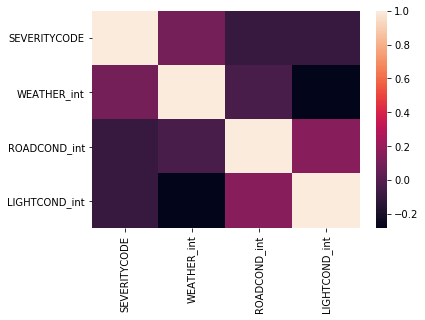

In [19]:
corr = predict.corr()
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)


Well, it seems that Road and Light conditions have the greater correlation with the accident severity variable. 

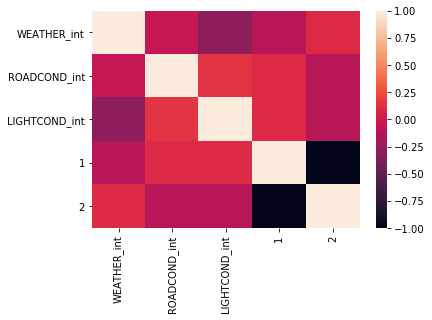

In [20]:
corr = Feature.corr()
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

Surprising looks like the same attributes are important for both types of accident severity, Road and Light conditions. Other variable ta have great correlation is in both graphs the Light and Weather condition. 

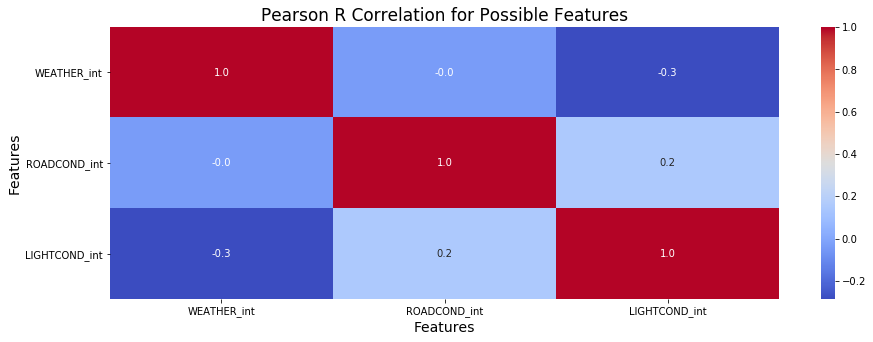

In [21]:
predict_corr = predict[['WEATHER_int', 'ROADCOND_int', 'LIGHTCOND_int']].corr()
ax = sns.heatmap(predict_corr, cmap='coolwarm', annot=True, fmt='.1f')
ax.figure.set_size_inches(15,5)
plt.xlabel('Features')
plt.ylabel('Features')
ax.xaxis.label.set_fontsize(14)
ax.yaxis.label.set_fontsize(14)
graph_title = 'Pearson R Correlation for Possible Features'
plt.title(graph_title, fontsize = 17)

plt.show()

As a last form of representation, decided to use the Pearson R correlation to represent the correlation between the variables to study face the Severity attribute.

#### Prediction

First step is to get the Panda dataframe into a Numpy array, to be able to get the model running.

X - feature vector ("WEATHER_int", "ROADCOND_int" and "LIGHTCOND_int")

y - predicted variable ("SEVERITYCODE")

We decided to use three types of models to run, to see the best to provide an answer to our issue: Decision Tree, K Nearest Neighbor (KNN), Logistic Regression and Support Vector Machine (SVM).

Some of the aspects to have in consideration regarding the models in use:
- Precision quantifies the number of positive class predictions that actually belong to the positive class.
- Recall quantifies the number of positive class predictions made out of all positive examples in the dataset.
- F-Measure provides a single score that balances both the concerns of precision and recall in one number.
- Jaccard Index compares members for two sets to see which members are shared and which are distinct. It’s a measure of similarity for the two sets of data, with a range from 0% to 100%. The higher the percentage, the more similar the two populations.

In [22]:
y = predict[['SEVERITYCODE']].values
y[0:5]

array([[2],
       [1],
       [1],
       [1],
       [2]], dtype=int64)

In [23]:
X = predict[['WEATHER_int', 'ROADCOND_int', 'LIGHTCOND_int']].values
X[0:5]

array([[1, 1, 1],
       [2, 1, 2],
       [1, 2, 1],
       [3, 2, 1],
       [2, 1, 1]])

Time to divide the data set into Training and test set. It was decided to attribute 20% of the data set to the Test set. 

In [24]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report, jaccard_similarity_score, f1_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
shift_ml = 'ML for Shift \n'
shift_ml += '\t X_train: ' + str(X_train.shape[0]) + '\n'
shift_ml += '\t y_train: ' + str(y_train.shape[0]) + '\n'
shift_ml += '\t X_test: ' + str(X_test.shape[0]) + '\n'
shift_ml += '\t y_test: ' + str(y_test.shape[0]) + '\n'
print(shift_ml)

ML for Shift 
	 X_train: 151469
	 y_train: 151469
	 X_test: 37868
	 y_test: 37868



In [25]:
#Defining the base for the visual representation of each section
def heatmap_for_confusion(df):
    fix,ax = plt.subplots(figsize = (15, 7))
    sns.heatmap(df, annot = True, fmt = 'd', cmap= 'Greens')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    graph_title = 'Heatmap for Confusion Matrix for Machine Learning Algorithms' 
    plt.show()

#### Decision Tree classifier

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
[[26376    22]
 [11465     5]]
              precision    recall  f1-score   support

           1       0.70      1.00      0.82     26398
           2       0.19      0.00      0.00     11470

   micro avg       0.70      0.70      0.70     37868
   macro avg       0.44      0.50      0.41     37868
weighted avg       0.54      0.70      0.57     37868



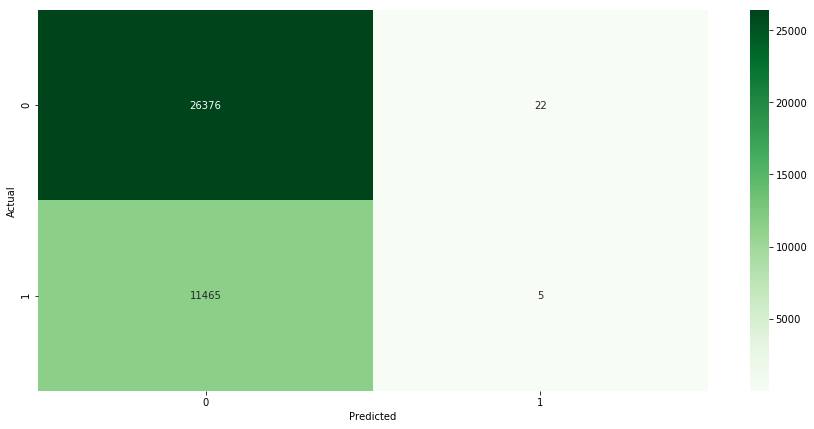

In [26]:
model = DecisionTreeClassifier()
print(model)

model.fit(X_train, y_train)
y_DecisionTree = model.predict(X_test)

matrix_DecisionTree = confusion_matrix(y_test, y_DecisionTree)
print(matrix_DecisionTree)

class_report = classification_report(y_test, y_DecisionTree)
print(class_report)
heatmap_for_confusion(matrix_DecisionTree)

#### K Nearest Neighbor(KNN)

In [27]:
from sklearn.neighbors import KNeighborsClassifier as knn
from sklearn.metrics import accuracy_score
ks = range(1, 10)
mean_accuracy = []

for n in ks:
    knn_model  = knn(n_neighbors = n)
    knn_model.fit(X_train, np.ravel(y_train, order='C'))
    knn_yhat = knn_model.predict(X_test)
    mean_accuracy.append(accuracy_score(y_test, knn_yhat))

In [28]:
for i in range(0, len(mean_accuracy)):
    print("k = {} has a Score = {} ".format(i + 1, mean_accuracy[i]))

k = 1 has a Score = 0.4790852434773423 
k = 2 has a Score = 0.6627495510721454 
k = 3 has a Score = 0.6404087884229429 
k = 4 has a Score = 0.6731012992500264 
k = 5 has a Score = 0.6404880109855287 
k = 6 has a Score = 0.6653110805957537 
k = 7 has a Score = 0.6398014154431182 
k = 8 has a Score = 0.6671331995352277 
k = 9 has a Score = 0.6092743213267139 


Text(0,0.5,'Testing Accuracy Values')

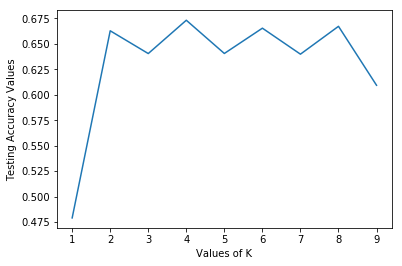

In [29]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(ks, mean_accuracy)
plt.xlabel('Values of K')
plt.ylabel('Testing Accuracy Values')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=4, p=2,
           weights='uniform')
[1 1 1 1 1]
              precision    recall  f1-score   support

           1       0.70      0.93      0.80     26398
           2       0.33      0.07      0.12     11470

   micro avg       0.67      0.67      0.67     37868
   macro avg       0.51      0.50      0.46     37868
weighted avg       0.59      0.67      0.59     37868



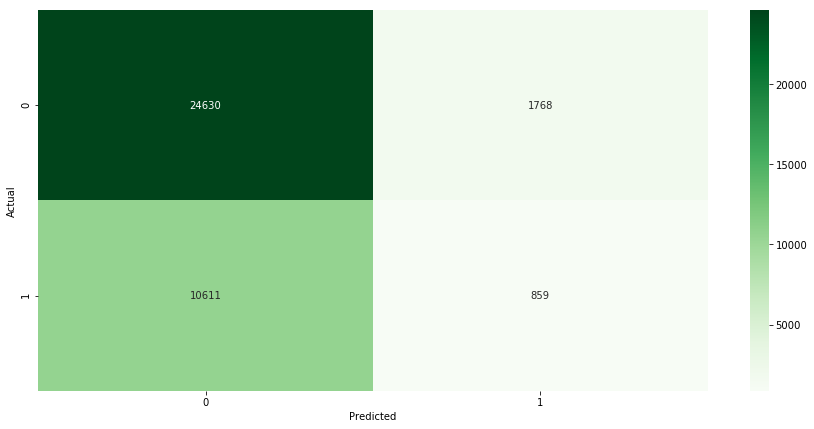

In [30]:
model = KNN(n_neighbors = 4)
print(model)

model.fit(X_train, np.ravel(y_train, order='C'))
y_pred_knn = model.predict(X_test)
print(y_pred_knn[:5])

matrix = confusion_matrix(y_test, y_pred_knn)

class_report = classification_report(y_test, y_pred_knn)
print(class_report)
heatmap_for_confusion(matrix)

#### Logistic Regression


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)
              precision    recall  f1-score   support

           1       0.70      0.93      0.80     26398
           2       0.33      0.07      0.12     11470

   micro avg       0.67      0.67      0.67     37868
   macro avg       0.51      0.50      0.46     37868
weighted avg       0.59      0.67      0.59     37868



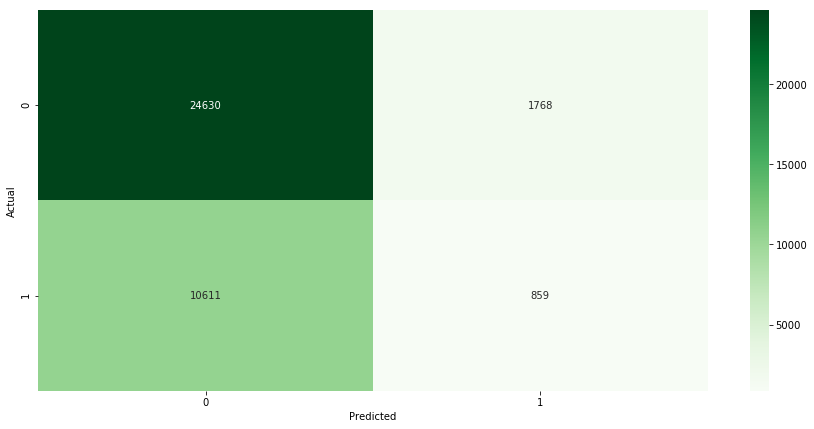

In [31]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
LogisticRegression(solver='lbfgs')

LRmodel = LogisticRegression()
print(LRmodel)
LRmodel.fit(X_train, np.ravel(y_train, order='C'))
y_pred_logReg = model.predict(X_test)
# print(y_pred_logReg)

matrix_logReg = confusion_matrix(y_test, y_pred_logReg)
class_report = classification_report(y_test, y_pred_logReg)
print(class_report)

heatmap_for_confusion(matrix_logReg)


#### Support Vector Machine

In [32]:
from sklearn import svm
SVM_model = svm.SVC(kernel='rbf')
SVM_model.fit(X_train, np.ravel(y_train, order='C')) 

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [33]:
yhat = SVM_model.predict(X_test)
yhat [0:5]

array([1, 1, 1, 1, 1], dtype=int64)

In [34]:
SVM_yhat = SVM_model.predict(X_test)
print("SVM Jaccard index: %.2f" % jaccard_similarity_score(y_test, SVM_yhat))
print("SVM F1-score: %.2f" % f1_score(y_test, SVM_yhat, average='weighted') )

SVM Jaccard index: 0.70
SVM F1-score: 0.57


C:\Users\Martha\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


### Results

#### Model Evaluation using Test set

In [35]:
ml_output_scores = 'Jaccard and F1 Scores \n'
ml_output_scores += '\t Decision Trees Scores: ' + '\n'
ml_output_scores += '\t\t f1 score: ' +  str(f1_score(y_test, y_DecisionTree, average='weighted'))+ '\n'
ml_output_scores += '\t\t jaccard score: ' +  str(jaccard_similarity_score(y_test, y_DecisionTree))+ '\n'
ml_output_scores += '\n'
ml_output_scores += '\t KNN Scores: ' + '\n'
ml_output_scores += '\t\t f1 score: ' +  str(f1_score(y_test, y_pred_knn, average='weighted')) + '\n'
ml_output_scores += '\t\t jaccard score: ' +  str(jaccard_similarity_score(y_test, y_pred_knn)) +'\n'
ml_output_scores += '\n'
ml_output_scores += '\t Logistic Regression Scores: ' + '\n'
ml_output_scores += '\t\t f1 score: ' +  str(f1_score(y_test, y_pred_logReg, average='weighted')) + '\n'
ml_output_scores += '\t\t jaccard score: ' +  str(jaccard_similarity_score(y_test, y_pred_logReg))+ '\n'
ml_output_scores += '\n'
ml_output_scores += '\t Support Vector Machine: ' + '\n'
ml_output_scores += '\t\t f1 score: ' +  str(f1_score(y_test, yhat, average='weighted')) + '\n'
ml_output_scores += '\t\t jaccard score: ' +  str(jaccard_similarity_score(y_test, yhat))+ '\n'
ml_output_scores += '\n'
print(ml_output_scores)

Jaccard and F1 Scores 
	 Decision Trees Scores: 
		 f1 score: 0.5727151085624445
		 jaccard score: 0.6966568078588782

	 KNN Scores: 
		 f1 score: 0.5940192367374898
		 jaccard score: 0.6731012992500264

	 Logistic Regression Scores: 
		 f1 score: 0.5940192367374898
		 jaccard score: 0.6731012992500264

	 Support Vector Machine: 
		 f1 score: 0.572688426582199
		 jaccard score: 0.6971057357135312




C:\Users\Martha\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [36]:
#Lets see how the models performed
models = [
          KNN(),
          LogisticRegression(),
          DecisionTreeClassifier(),
          svm.SVC()
]
CV=5
cv_df = pd.DataFrame(index = range(CV*len(models)))
entries = []
for model in models:
    model_name = model.__class__.__name__
    accuracies = cross_val_score(model, X, y, scoring = 'accuracy', cv = CV)
    for fold_idx, accuracy in enumerate(accuracies):
        entries.append((model_name, fold_idx, accuracy))
    cv_df = pd.DataFrame(entries, columns = ['model_name', 'fold_idx', 'accuracy'])

C:\Users\Martha\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Martha\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Martha\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Martha\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vect

In [37]:
cv_df.groupby('model_name').accuracy.mean()

model_name
DecisionTreeClassifier    0.698442
KNeighborsClassifier      0.685582
LogisticRegression        0.697983
SVC                       0.698648
Name: accuracy, dtype: float64

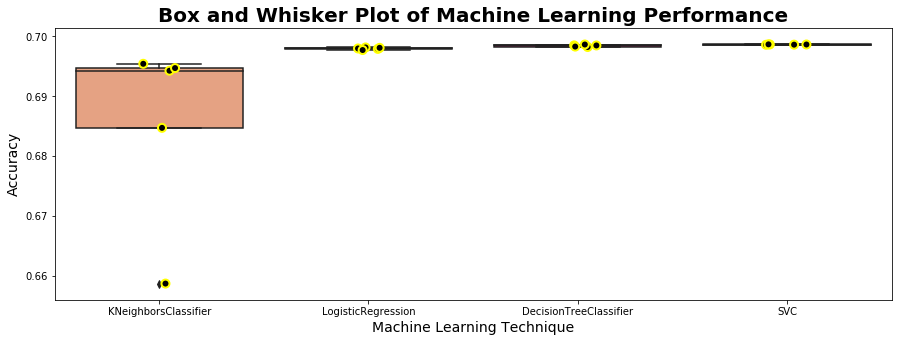

In [38]:
#Box-Whisker Plot of the outputs of the models used above.
f, ax = plt.subplots(figsize = (15,5))
ax = sns.boxplot(x = 'model_name', y = 'accuracy', data = cv_df, palette='rocket_r')
ax = sns.stripplot(x = 'model_name', y= 'accuracy', data= cv_df, size = 8, jitter = True, color = 'black',
                   edgecolor = 'yellow', linewidth = 2)
plt.title ('Box and Whisker Plot of Machine Learning Performance', fontsize = 20, fontweight = 'bold')
ax.set_xlabel('Machine Learning Technique', fontsize = 14)
ax.set_ylabel('Accuracy', fontsize = 14)

plt.show()